In [2]:
import os
from dotenv import load_dotenv
import json
import urllib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [3]:
load_dotenv()

BEA_API_KEY = os.getenv('BEA_key')
BEA_API_KEY

'F2C550F7-DDDA-4295-9443-1E93EC24D3C2'

In [4]:
#Create dictionary from state name to abbreviation
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [5]:
def create_url(table, linecode, year='LAST10', key=BEA_API_KEY, method='GetData', dataset='Regional', geofips='STATE'):
    url = f"https://apps.bea.gov/api/data?UserID={key}&method={method}&datasetname={dataset}&TableName={table}&LineCode={linecode}&Year={year}&GeoFips={geofips}&ResultFormat=JSON"
    return(url)

In [6]:
def create_df(url, metric):

    with urllib.request.urlopen(url) as url:
        data = json.load(url)
        data = pd.DataFrame(data['BEAAPI']['Results']['Data'])
        data['metric'] = metric
    
    return(data)

*****
Import state level income, population and GDP Statistics from Bureau of Economic Analysis
*****

In [7]:
#Import data from BEA API into dataframes
year = '2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024'
table1 = 'SQINC1' #personal income summary
linecode1 = '1' #Personal income (millions of dollars, seasonally adjusted)
linecode2 = '2' #Population (midperiod, persons)
linecode3 = '3' #Per capita personal income (dollars)
table2 = 'SQGDP1' #GDP by state summary
linecode4 = '3' #Current-dollar GDP (millions of current dollars)

url1 = create_url(table=table1, linecode=linecode1, year=year)
url2 = create_url(table=table1, linecode=linecode2, year=year)
url3 = create_url(table=table1, linecode=linecode3, year=year)
url4 = create_url(table=table2, linecode=linecode4, year=year)

df1 = create_df(url=url1, metric="personal_income")
df2 = create_df(url=url2, metric="population")
df3 = create_df(url=url3, metric="personal_income_per_capita")
df4 = create_df(url=url3, metric="state_GDP_current_dollar")

In [8]:
#Create one dataframe with all BEA data
combined_df = pd.concat([df1,df2,df3,df4], ignore_index=True)
combined_df = combined_df[combined_df.GeoFips.between('00001','90000')]
combined_df.GeoName = combined_df.GeoName.str.replace(' *','')
combined_df = combined_df.drop(columns=['GeoFips','Code','CL_UNIT', 'UNIT_MULT','NoteRef'])
combined_df['state'] = combined_df['GeoName'].map(us_state_to_abbrev)
combined_df.groupby(['state','GeoName']).count().reset_index()

,state,GeoName,TimePeriod,DataValue,metric
0,AK,Alaska,384,384,384
1,AL,Alabama,384,384,384
2,AR,Arkansas,384,384,384
3,AZ,Arizona,384,384,384
4,CA,California,384,384,384
5,CO,Colorado,384,384,384
6,CT,Connecticut,384,384,384
7,DC,District of Columbia,384,384,384
8,DE,Delaware,384,384,384
9,FL,Florida,384,384,384


In [9]:
# Create date columns in dataframe
q_to_p_dict = {'Q1':('03','31'),
               'Q2':('06','30'),
               'Q3':('09','30'),
               'Q4':('12','31')}

combined_df['year'] = combined_df.TimePeriod.str[:4]
combined_df['quarter'] = combined_df.TimePeriod.str[4:]
combined_df[['month','day']] = combined_df['quarter'].map(q_to_p_dict).apply(pd.Series)
combined_df['period'] = pd.to_datetime(combined_df[['year', 'month', 'day']])
combined_df.DataValue = combined_df.DataValue.apply(pd.to_numeric)
combined_df = combined_df[combined_df.DataValue > 0]
combined_df

,GeoName,TimePeriod,DataValue,metric,state,year,quarter,month,day,period
96,Alabama,2002Q1,112956.5,personal_income,AL,2002,Q1,03,31,2002-03-31
97,Alabama,2002Q2,114670.2,personal_income,AL,2002,Q2,06,30,2002-06-30
98,Alabama,2002Q3,115567.2,personal_income,AL,2002,Q3,09,30,2002-09-30
99,Alabama,2002Q4,116836.8,personal_income,AL,2002,Q4,12,31,2002-12-31
100,Alabama,2015Q1,185291.7,personal_income,AL,2015,Q1,03,31,2015-03-31
...,...,...,...,...,...,...,...,...,...,...
22263,Wyoming,2017Q4,57480.0,state_GDP_current_dollar,WY,2017,Q4,12,31,2017-12-31
22264,Wyoming,2016Q4,53640.0,state_GDP_current_dollar,WY,2016,Q4,12,31,2016-12-31
22265,Wyoming,2016Q3,53175.0,state_GDP_current_dollar,WY,2016,Q3,09,30,2016-09-30
22266,Wyoming,2016Q2,53198.0,state_GDP_current_dollar,WY,2016,Q2,06,30,2016-06-30


In [10]:
pd.DataFrame(combined_df.groupby(['period','metric']).DataValue.mean())

DataValue
period     metric                                  
2000-03-31 personal_income             1.648928e+05
2000-06-30 personal_income             1.676473e+05
2000-09-30 personal_income             1.707959e+05
2000-12-31 personal_income             1.727608e+05
2001-03-31 personal_income             1.759132e+05
...                                             ...
2023-09-30 state_GDP_current_dollar    6.708527e+04
2023-12-31 personal_income             4.566380e+05
           personal_income_per_capita  6.764208e+04
           population                  6.581893e+06
           state_GDP_current_dollar    6.764208e+04

[264 rows x 1 columns]

In [11]:
#Widen BEA data to create seperate column for each metric
BEA_data = combined_df.pivot_table(index=['period','year','month','state','GeoName'],
                                   columns='metric',
                                   values='DataValue')
BEA_data = BEA_data.reset_index()
BEA_data = BEA_data.rename(columns={'state':'state_ID', 'GeoName':'state_name'})
BEA_data

metric,period,year,month,state_ID,state_name,personal_income,personal_income_per_capita,population,state_GDP_current_dollar
0,2000-03-31,2000,03,AK,Alaska,19682.4,NaN,NaN,NaN
1,2000-03-31,2000,03,AL,Alabama,105965.0,NaN,NaN,NaN
2,2000-03-31,2000,03,AR,Arkansas,59627.2,NaN,NaN,NaN
3,2000-03-31,2000,03,AZ,Arizona,132026.7,NaN,NaN,NaN
4,2000-03-31,2000,03,CA,California,1092962.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4891,2023-12-31,2023,12,VT,Vermont,43402.6,66995.0,647847.0,66995.0
4892,2023-12-31,2023,12,WA,Washington,632495.6,80814.0,7826557.0,80814.0
4893,2023-12-31,2023,12,WI,Wisconsin,384209.5,64889.0,5921015.0,64889.0
4894,2023-12-31,2023,12,WV,West Virginia,93973.7,53109.0,1769466.0,53109.0


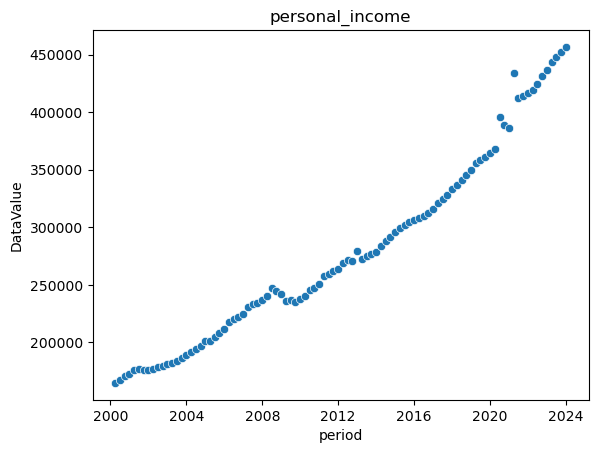

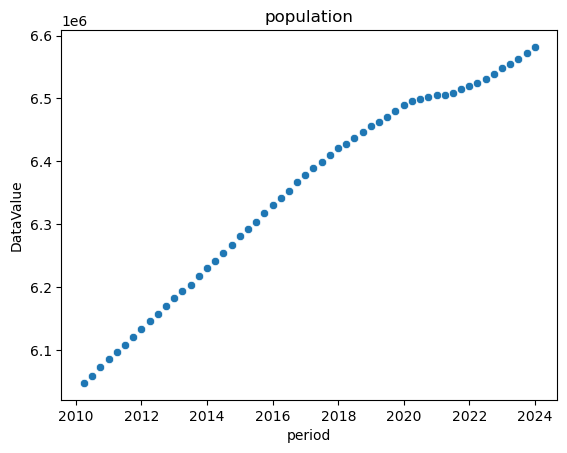

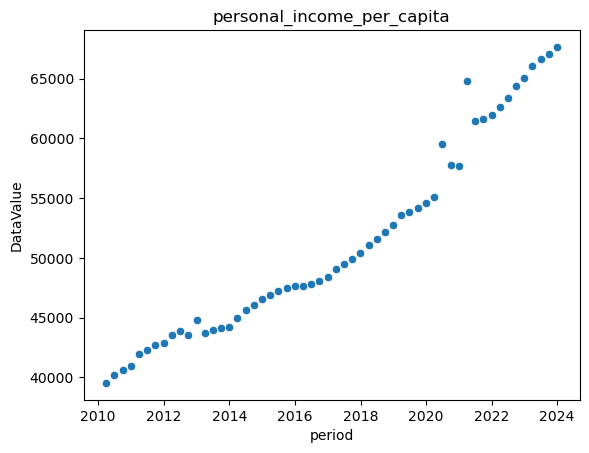

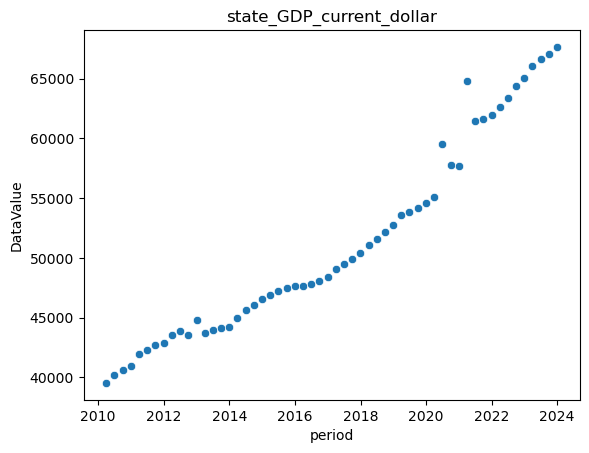

In [12]:
#state level line plot

for metric in combined_df.metric.unique():
    data = combined_df[combined_df.metric == metric]
    data = pd.DataFrame(data.groupby(['period','metric']).DataValue.mean())
    sns.scatterplot(data=data,
                    x='period',
                    y='DataValue').set_title(metric)
    plt.show()

In [13]:
print(BEA_data.shape)
BEA_data.head()

(4896, 9)


metric,period,year,month,state_ID,state_name,personal_income,personal_income_per_capita,population,state_GDP_current_dollar
0,2000-03-31,2000,03,AK,Alaska,19682.4,NaN,NaN,NaN
1,2000-03-31,2000,03,AL,Alabama,105965.0,NaN,NaN,NaN
2,2000-03-31,2000,03,AR,Arkansas,59627.2,NaN,NaN,NaN
3,2000-03-31,2000,03,AZ,Arizona,132026.7,NaN,NaN,NaN
4,2000-03-31,2000,03,CA,California,1092962.9,NaN,NaN,NaN


In [14]:
BEA_data.to_pickle('../Data/BEA.pkl')